## Re-plotting pLDDT scores

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
# Importing plddt.csv
csv_path = input('Input the path to your plddt.csv file: ')
df = pd.read_csv(csv_path)
df = df.set_index('Unnamed: 0')
df_xy = df.transpose(copy=True)
df_xy = df_xy.rename_axis(columns={'Unnamed: 0':"AA"})
df_xy

AA,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,49.930060,47.935436,46.628313,45.348801,51.323829,44.671595,45.666096,48.276149,47.809907,47.634948,...,47.479187,45.406498,48.533649,47.720873,49.619131,41.198743,42.937934,40.878982,39.902342,37.860799
1,64.710906,63.182834,63.065413,61.327694,67.879718,52.010854,55.527723,59.612710,59.170458,59.147445,...,55.127389,52.937662,57.175906,55.857443,58.443282,51.351009,53.735727,51.788716,48.937916,45.564963
2,69.971282,66.497902,65.864441,64.792931,69.096282,59.867454,62.777107,66.914383,66.443977,66.443101,...,58.777684,57.458871,60.196319,59.458733,60.535972,55.932824,58.489698,56.638113,53.884635,50.745553
3,62.351294,60.261158,59.983084,59.692502,63.181215,57.938227,59.436413,62.325342,62.444444,62.474695,...,54.308817,52.608432,55.993693,55.422089,57.184800,51.722958,54.362273,51.927515,49.097743,46.244151
4,65.816443,64.021679,63.659206,63.514132,66.909765,62.201846,63.357755,66.762266,66.545388,66.846348,...,59.030059,56.205383,59.920064,59.037157,60.522882,58.739256,60.935302,58.528079,56.204024,51.845272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,50.087113,51.765632,49.620553,49.970381,51.936173,52.713319,52.008368,53.604343,51.601228,53.295371,...,51.837215,50.856611,50.492253,50.693119,52.081234,49.003183,47.460187,50.754745,49.514027,50.638571
1099,47.722068,48.552403,46.470041,46.826866,48.382870,49.418790,48.375289,50.147010,48.509563,49.560268,...,48.670891,47.608596,47.123901,48.080832,48.879678,44.888237,43.225929,47.063437,45.050397,46.403070
1100,44.892911,45.408809,43.140384,43.926345,44.635261,42.976371,42.364650,43.792400,42.237399,42.954494,...,43.286333,42.650014,42.070444,42.772509,43.915097,39.865545,38.064626,41.792383,39.925827,41.736217
1101,35.268397,35.770614,33.256361,34.336262,35.534251,37.073958,36.706815,38.052972,36.545852,37.498614,...,35.115843,34.017965,33.966304,34.373861,35.542702,32.252651,30.315960,33.608002,32.154484,33.820366


In [15]:
length = df_xy.shape[0]

1103

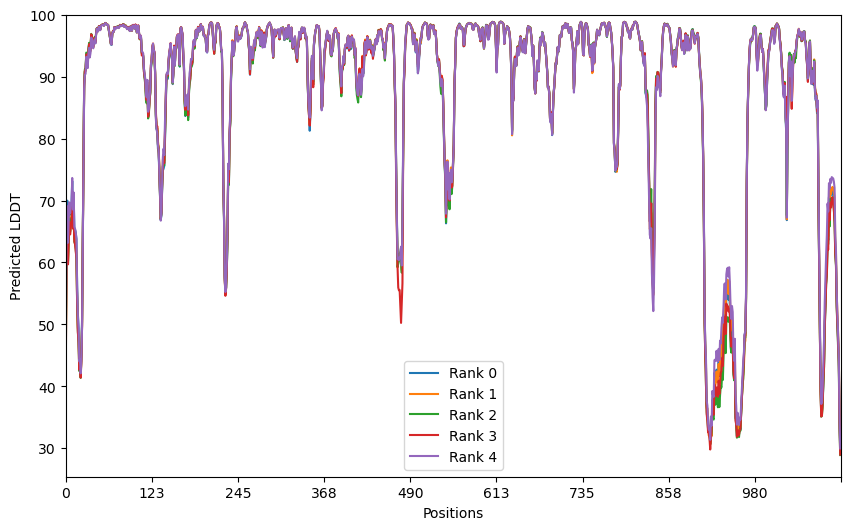

In [26]:
# Plotting top-ranked prediction pLDDT scores
max_rank = int(input('How many of the top-ranked predictions would you like to plot? '))
rank_range = np.arange(0,max_rank,1)

fig, ax = plt.subplots(figsize=(10,6))
for i in rank_range:
    ax.plot(df_xy[i], label='Rank '+str(i))

ax.set_ylabel('Predicted LDDT')
ax.set_xlabel('Positions')
ax.legend(loc='best')
#ax.xaxis.set_major_locator(plt.MaxNLocator(df_xy.shape[0]/))
ax.set_ylim(top=100)
xrange = input('What range of residues do you want to plot (e.g. "0-100" – leave blank for all): ')
if xrange == '':
    xmin, xmax = 0, df_xy.shape[0]
else:
    xrng = xrange.split('-')
    xmin, xmax = int(xrng[0]), int(xrng[1])
ax.set_xlim(xmin,xmax)
ax.set_xticks(np.round(np.linspace(xmin, xmax, 10), 2))


array([0, 1, 2, 3, 4])